In [1]:
import h5py
import anndata as ad
import pandas as pd
import numpy as np
import scipy.sparse as sp
import scanpy as sc
import harmonypy as hm

In [2]:
adata = sc.read_h5ad("/Users/likai/Downloads/BICAN_MiniAtlas_BGC_0528_QCrmGlut_MapMyCell_ALLCell_600K_FM_GATA3_updated_1118.h5ad")

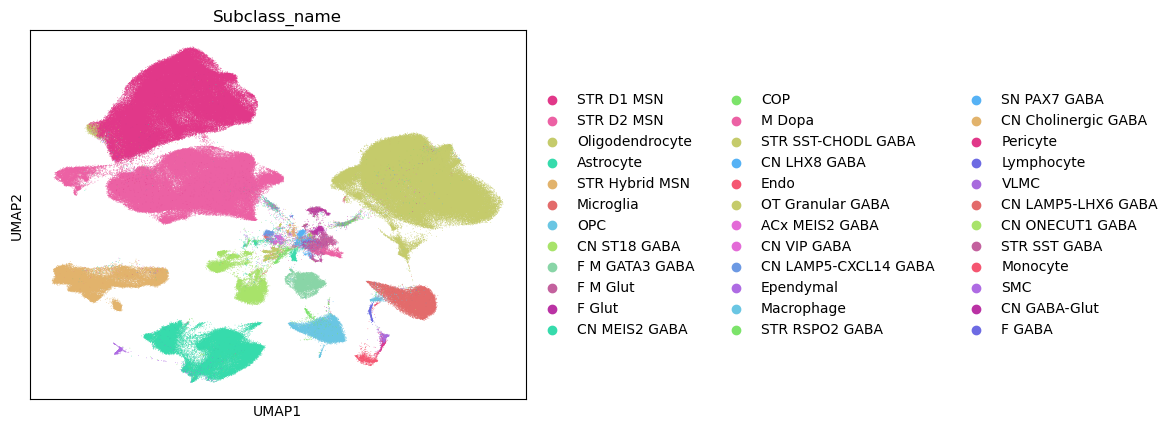

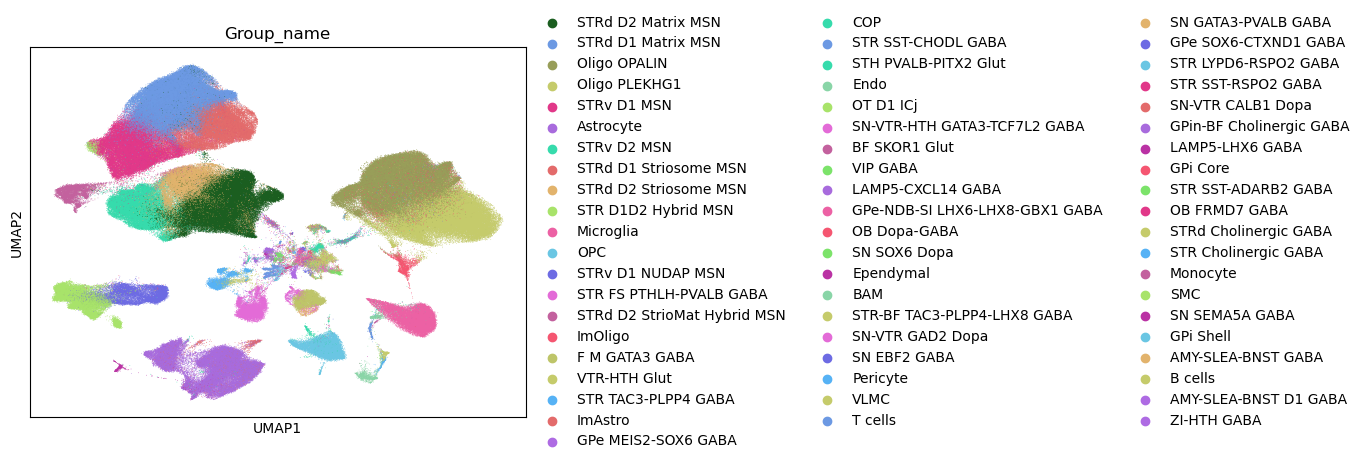

In [3]:
import random

# -------------------------------------------------
# 1. cell color（Class / Subclass / Group）
# -------------------------------------------------

# ✅ Group
Group_colors = {
    "Oligo OPALIN": "#989e59", 
    "STRd D2 Matrix MSN": "#1b5e20",  
    "STRd D1 Matrix MSN": "#6c99e3",
    "Astrocyte": "#a86bdd",
    "Microglia": "#ec61a4",
    "Oligo PLEKHG1": "#c5cb6b",
    "STRv D1 MSN": "#e13889",
    "STRv D2 MSN": "#36dbac",
    "STRd D1 Striosome MSN": "#e36b6b",
    "STRd D2 Striosome MSN": "#e2b36c",
    "STR D1D2 Hybrid MSN": "#a8e36a",
    "OPC": "#6ac6e3",
    "STRv D1 NUDAP MSN": "#6d6be3",
    "STR FS PTHLH-PVALB GABA": "#e36bd7",
    "STR TAC3-PLPP4 GABA": "#56b2f5",
    "VIP GABA": "#7ce36a",
    "ZI-HTH GABA": "#ae6be3",
    "Ependymal": "#ba32a4",
    "STRd D2 StrioMat Hybrid MSN": "#c3619e",
    "ImOligo": "#f55671",
    "VTR-HTH Glut": "#c5cb6b",
    "Endo": "#89d5a7",
    "STR SST-CHODL GABA": "#6c99e3",
    "LAMP5-CXCL14 GABA": "#a86bdd",
    "GPe-NDB-SI LHX6-LHX8-GBX1 GABA": "#ec61a4",
    "VLMC": "#c5cb6b",
    "STR SST-RSPO2 GABA": "#e13889",
    "STH PVALB-PITX2 Glut": "#36dbac",
    "ImAstro": "#e36b6b",
    "AMY-SLEA-BNST GABA": "#e2b36c",
    "OT D1 ICj": "#a8e36a",
    "STR LYPD6-RSPO2 GABA": "#6ac6e3",
    "GPe SOX6-CTXND1 GABA": "#6d6be3",
    "SN-VTR-HTH GATA3-TCF7L2 GABA": "#e36bd7",
    "Pericyte": "#56b2f5",
    "SN SOX6 Dopa": "#7ce36a",
    "GPe MEIS2-SOX6 GABA": "#ae6be3",
    "LAMP5-LHX6 GABA": "#ba32a4",
    "BF SKOR1 Glut": "#c3619e",
    "GPi Core": "#f55671",
    "STR-BF TAC3-PLPP4-LHX8 GABA": "#c5cb6b",
    "BAM": "#89d5a7",
    "T cells": "#6c99e3",
    "GPin-BF Cholinergic GABA": "#a86bdd",
    "SN GATA3-PAX8 GABA": "#ec61a4",
    "STRd Cholinergic GABA": "#c5cb6b",
    "OB FRMD7 GABA": "#e13889",
    "COP": "#36dbac",
    "SN-VTR CALB1 Dopa": "#e36b6b",
    "SN GATA3-PVALB GABA": "#e2b36c",
    "SMC": "#a8e36a",
    "GPi Shell": "#6ac6e3",
    "SN EBF2 GABA": "#6d6be3",
    "SN-VTR GAD2 Dopa": "#e36bd7",
    "STR Cholinergic GABA": "#56b2f5",
    "STR SST-ADARB2 GABA": "#7ce36a",
    "AMY-SLEA-BNST D1 GABA": "#ae6be3",
    "SN SEMA5A GABA": "#ba32a4",
    "Monocyte": "#c3619e",
    "OB Dopa-GABA": "#f55671",
    "B cells": "#c5cb6b",
    "F M GATA3 GABA": "#bec569",
}

# ✅ Subclass
subclass_colors = {
    "STR D2 MSN": "#ec61a4",
    "Oligodendrocyte": "#c5cb6b",
    "STR D1 MSN": "#e13889",
    "Astrocyte": "#36dbac",
    "Microglia": "#e36b6b",
    "STR Hybrid MSN": "#e2b36c",
    "CN ST18 GABA": "#a8e36a",
    "OPC": "#6ac6e3",
    "F GABA": "#6d6be3",
    "CN VIP GABA": "#e36bd7",
    "CN LHX8 GABA": "#56b2f5",
    "STR RSPO2 GABA": "#7ce36a",
    "Ependymal": "#ae6be3",
    "F Glut": "#ba32a4",
    "F M Glut": "#c3619e",
    "Endo": "#f55671",
    "STR SST-CHODL GABA": "#c5cb6b",
    "F M GATA3 GABA": "#89d5a7",
    "CN LAMP5-CXCL14 GABA": "#6c99e3",
    "VLMC": "#a86bdd",
    "M Dopa": "#ec61a4",
    "OT Granular GABA": "#c5cb6b",
    "Pericyte": "#e13889",
    "CN MEIS2 GABA": "#36dbac",
    "CN LAMP5-LHX6 GABA": "#e36b6b",
    "CN Cholinergic GABA": "#e2b36c",
    "CN ONECUT1 GABA": "#a8e36a",
    "Macrophage": "#6ac6e3",
    "Lymphocyte": "#6d6be3",
    "ACx MEIS2 GABA": "#e36bd7",
    "SN PAX7 GABA": "#56b2f5",
    "COP": "#7ce36a",
    "SMC": "#ae6be3",
    "CN GABA-Glut": "#ba32a4",
    "STR SST GABA": "#c3619e",
    "Monocyte": "#f55671",
}

# ✅ Class
palette_class_dict = {
    "CN LGE GABA": "#6d6be3",
    "OPC-Oligo": "#e36bd7",
    "Astro-Epen": "#56b2f5",
    "Immune": "#7ce36a",
    "CN MGE GABA": "#ae6be3",
    "F M GABA": "#ba32a4",
    "Vascular": "#c3619e",
    "CN CGE GABA": "#f55671",
    "F M Glut": "#c5cb6b",
    "M Dopa": "#89d5a7",
    "Cx GABA": "#6c99e3",
    "CN GABA-Glut": "#a86bdd",
}

# -------------------------------------------------
# 2. Uniformly convert to category type + automatically fill in the gray
# -------------------------------------------------

for key in ["Class_name", "Subclass_name", "Group_name"]:
    adata.obs[key] = adata.obs[key].astype("category")

def complete_palette(adata, key, color_dict):
    cats = adata.obs[key].cat.categories
    missing = [c for c in cats if c not in color_dict]
    if missing:
        random.seed(42)
        for c in missing:
            color_dict[c] = "#{:06x}".format(random.randint(0x888888, 0xDDDDDD))
        print(f"⚠️  补充灰色类别到 {key}：", missing)
    return [color_dict[c] for c in cats]

# -------------------------------------------------
# 3. Generate color palettes respectively
# -------------------------------------------------

palette_class_list = complete_palette(adata, "Class_name", palette_class_dict)
palette_sub_list = complete_palette(adata, "Subclass_name", subclass_colors)
palette_group_list = complete_palette(adata, "Group_name", Group_colors)

# -------------------------------------------------
# 4. plot UMAP
# -------------------------------------------------

sc.pl.umap(adata, color="Subclass_name", palette=palette_sub_list, size=1)
sc.pl.umap(adata, color="Group_name", palette=palette_group_list, size=1)

In [5]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib as mpl
import random
from collections import OrderedDict
from sklearn.neighbors import NearestNeighbors

# —— PDF settings ——
mpl.rcParams.update({
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "svg.fonttype": "none",
    "text.usetex": False,
    "font.family": "DejaVu Sans",
})

def _densest_point(coords, k=50):
    """Return the point with the highest local density in coords (n,2).
    Density is defined as 1 / mean distance to k nearest neighbors."""
    if coords.shape[0] <= 3:
        return coords.mean(0)
    k = min(k, max(1, coords.shape[0] - 1))
    nn = NearestNeighbors(n_neighbors=k+1).fit(coords)
    dists, _ = nn.kneighbors(coords, n_neighbors=k+1)

    dens = 1.0 / (dists[:, 1:].mean(1) + 1e-9)
    return coords[np.argmax(dens)]

def _repel(points, min_sep, iters=80, step=0.02):
    """Simple repulsion-based overlap removal.
    Iteratively push points apart so that pairwise distance >= min_sep (data coordinates)."""
    pts = points.copy().astype(float)
    for _ in range(iters):
        moved = False
        for i in range(len(pts)):
            shift = np.zeros(2, dtype=float)
            for j in range(len(pts)):
                if i == j:
                    continue
                v = pts[i] - pts[j]
                dist = np.linalg.norm(v)
                if dist < min_sep and dist > 1e-9:
                    shift += (v / dist) * (min_sep - dist)
            if np.any(shift):
                pts[i] += step * shift
                moved = True
        if not moved:
            break
    return pts

def plot_umap_numbered(
    adata,
    col,
    color_dict,
    size=0.6,
    thresh=1500,
    square_size=4,      # keep the main plot square
    legend_width=5,     
    legend_cols=2,      
    legend_title=None,
    out_pdf=None,
    seed=0,
    k_density=50        # number of neighbors used to estimate density center
):
    # —— categories and ordering ——
    vc = adata.obs[col].value_counts()
    big   = vc[vc >  thresh].index.tolist()
    small = vc[vc <= thresh].index.tolist()
    small_sorted = sorted(small, key=lambda x: vc[x], reverse=True)
    order = big + small_sorted
    adata.obs[col] = adata.obs[col].astype("category").cat.reorder_categories(order)

    # —— colors ——
    random.seed(seed)
    for c in order:
        if c not in color_dict:
            color_dict[c] = "#{:06x}".format(random.randint(0x666666, 0xCCCCCC))
    palette = [color_dict[c] for c in order]

    # —— layout: left square main plot + right legend area ——
    fig = plt.figure(figsize=(square_size + legend_width, square_size))
    left_w = square_size / (square_size + legend_width)
    ax_umap = fig.add_axes([0.06, 0.08, left_w*0.94, 0.86])   # main plot
    ax_leg  = fig.add_axes([0.06 + left_w*0.98, 0.08, 0.92-left_w, 0.86])  # legend
    ax_leg.axis("off")

    ax = sc.pl.umap(
        adata, color=col, palette=palette, size=size,
        legend_loc=None, show=False, ax=ax_umap
    )
    ax.set_aspect("equal", adjustable="box")

    coords = adata.obsm["X_umap"]
    cat = adata.obs[col].values

    # —— large categories: label by name only (placed at density center) ——
    for c in big:
        mask = (cat == c)
        if mask.sum() > 0:
            xm, ym = _densest_point(coords[mask], k=k_density)
            ax.text(xm, ym, c, fontsize=7, weight="bold",
                    ha="center", va="center")

    # —— circle radius and minimum separation (auto-scaled to data range) ——
    span = max(np.ptp(coords[:,0]), np.ptp(coords[:,1]))
    radius = 0.010 * span
    min_sep = 2.2 * radius  # minimum circle spacing

    # —— mapping for small category numbering ——
    small_to_num = OrderedDict((c, i+1) for i, c in enumerate(small_sorted))

    # —— find density centers and apply light repulsion to avoid overlap ——
    anchors = []
    for c in small_sorted:
        mask = (cat == c)
        if mask.sum() == 0:
            anchors.append(np.array([np.nan, np.nan]))
        else:
            anchors.append(_densest_point(coords[mask], k=k_density))
    anchors = np.array(anchors)

    ok = ~np.isnan(anchors).any(1)
    anchors[ok] = _repel(anchors[ok], min_sep=min_sep, iters=80, step=0.08)

    # —— draw numbered circles (0.34 pt line width, 20% background for numbers) ——
    number_fontsize = 4
    for i, c in enumerate(small_sorted):
        if np.isnan(anchors[i]).any():
            continue
        xm, ym = anchors[i]
        num = small_to_num[c]
        colr = color_dict[c]

        ax.add_patch(Circle(
            (xm, ym), radius=radius, fill=False,
            edgecolor=colr, linewidth=0.34
        ))

        ax.text(
            xm, ym, str(num),
            fontsize=number_fontsize, weight="bold",
            color=colr, ha="center", va="center",
            bbox=dict(facecolor=colr, alpha=0.20, edgecolor="none", pad=0.12)
        )

    # —— legend layout (multi-column grid) ——
    if legend_title is None:
        legend_title = f"{col} (≤{thresh})"
    ax_leg.text(0.0, 1.08, legend_title, fontsize=8, weight="bold",
                ha="left", va="bottom", transform=ax_leg.transAxes)

    n = len(small_sorted)
    n_rows = int(np.ceil(n / legend_cols))
    y0, y1 = 0.98, 0.02
    x0, x1 = 0.02, 0.98
    xs = np.linspace(x0, x1, legend_cols+1)
    ys = np.linspace(y0, y1, n_rows+1)
    r = 0.010  # circle radius in legend (axes coordinates)

    idx = 0
    for col_i in range(legend_cols):
        x_circle = (xs[col_i] + xs[col_i+1]) * 0.5 - 0.06
        x_text   = x_circle + 0.06
        for row_i in range(n_rows):
            if idx >= n:
                break
            c = small_sorted[idx]
            num = small_to_num[c]
            colr = color_dict[c]
            y = (ys[row_i] + ys[row_i+1]) * 0.5

            ax_leg.add_patch(Circle(
                (x_circle, y), radius=r, transform=ax_leg.transAxes,
                fill=False, edgecolor=colr, linewidth=0.34
            ))

            ax_leg.text(
                x_circle, y, str(num),
                fontsize=6, weight="bold", color=colr,
                ha="center", va="center",
                bbox=dict(facecolor=colr, alpha=0.20, edgecolor="none", pad=0.10),
                transform=ax_leg.transAxes
            )

            # show only cell type name (not counts)
            ax_leg.text(
                x_text, y, f"{c}",
                fontsize=7, ha="left", va="center",
                transform=ax_leg.transAxes
            )
            idx += 1

    if out_pdf:
        fig.savefig(out_pdf, bbox_inches="tight")
        print("✅ Saved:", out_pdf)

    plt.show()
    return small_to_num

✅ Saved: /Users/likai/BGC_RNA_ALLcell-600K_Class_umap_0130.pdf


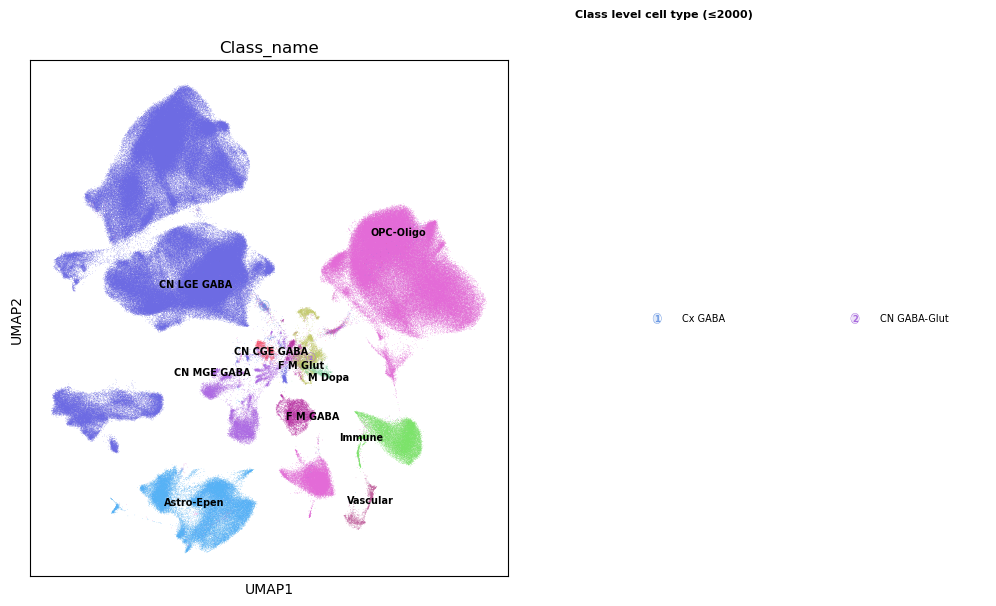

✅ Saved: /Users/likai/BGC_RNA3_ALLcell-600K_Subclass_umap_0130.pdf


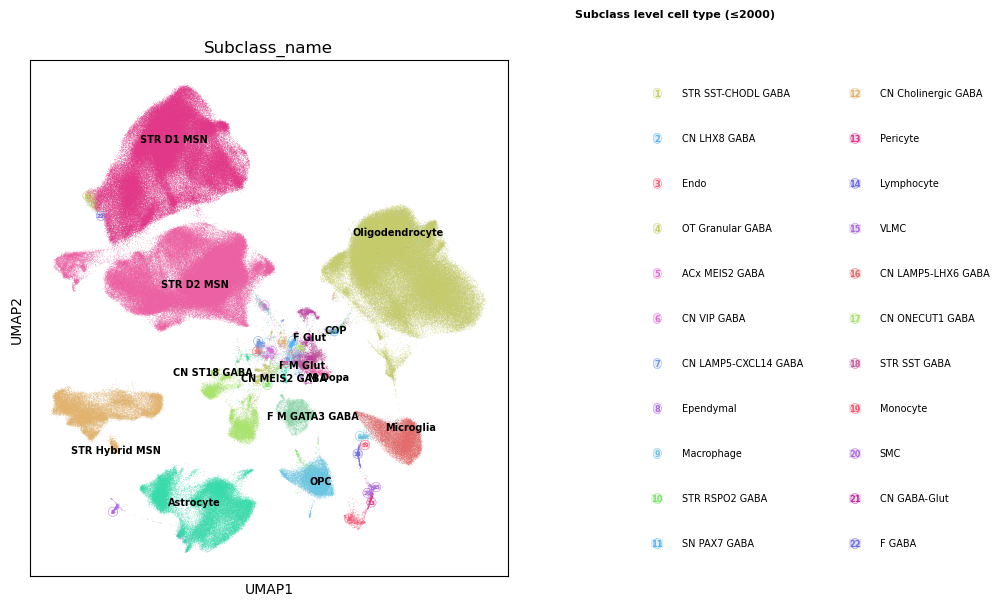

✅ Saved: /Users/likai/BGC_RNA_ALLcell-600K_Group_umap_0130.pdf


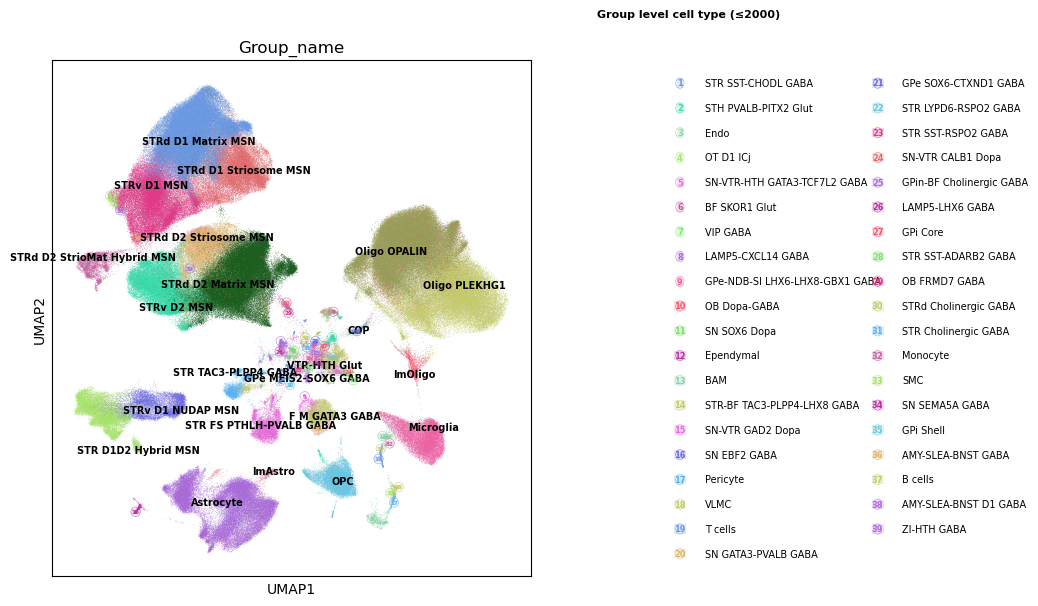

In [6]:
# ================= Plot UMAP =================
# set thresh、square_size、size 

# 1) Class level
_ = plot_umap_numbered(
    adata,
    col="Class_name",
    color_dict=palette_class_dict,
    size=0.5,
    thresh=1500,
    square_size=6,  
    legend_title="Class level cell type (≤2000)",
    out_pdf="/Users/likai/BGC_RNA_ALLcell-600K_Class_umap_0130.pdf",
)

# 2) Subclass level
_ = plot_umap_numbered(
    adata,
    col="Subclass_name",
    color_dict=subclass_colors,
    size=0.5,
    thresh=1500,
    square_size=6,
    legend_title="Subclass level cell type (≤2000)",
    out_pdf="/Users/likai/BGC_RNA3_ALLcell-600K_Subclass_umap_0130.pdf",
)

# 3) Group level
_ = plot_umap_numbered(
    adata,
    col="Group_name",
    color_dict=Group_colors,
    size=0.5,
    thresh=1500,
    square_size=6,
    legend_title="Group level cell type (≤2000)",
    out_pdf="/Users/likai/BGC_RNA_ALLcell-600K_Group_umap_0130.pdf",
)


In [ ]:
import scanpy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# =========================
# 0) Make PDF text editable (Adobe Illustrator friendly)
# =========================
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"]  = 42
mpl.rcParams["font.size"]    = 9

# =========================
# 1) Input HMBA marker genes
# =========================
genes = ["BCAS1","NGEF","KIT","CXCL14","KANK4","SLC18A2","LMX1A","PTPRC","COBLL1"]

# Expression matrix source: prefer raw if available
use_raw = adata.raw is not None
var_names = adata.raw.var_names if use_raw else adata.var_names

# Check for missing genes
missing = [g for g in genes if g not in var_names]
if missing:
    print("[WARN] missing genes:", missing)

# Keep only genes present in the dataset
genes_ok = [g for g in genes if g in var_names]
if len(genes_ok) == 0:
    raise ValueError("No genes found in adata.var_names/adata.raw.var_names")

# =========================
# 2) Colormap: light gray → dark red
# =========================
custom_cmap = LinearSegmentedColormap.from_list(
    "lightgray_darkred",
    ["#F0F0F0", "#8B0000"]
)

# =========================
# 3) Figure layout: each panel is square
# =========================
ncols = 3
n = len(genes_ok)
nrows = int(np.ceil(n / ncols))

# Side length (inches) for each panel; adjust as needed
panel_size = 3.2  # square size for each small UMAP
fig_w = panel_size * ncols
fig_h = panel_size * nrows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_w, fig_h))
axes = np.array(axes).reshape(-1)

# =========================
# 4) Plot each gene + rasterize only scatter points
# =========================
for i, g in enumerate(genes_ok):
    ax = axes[i]

    sc.pl.umap(
        adata,
        color=g,
        use_raw=use_raw,
        vmin=0,
        vmax="p99.9",     
        cmap=custom_cmap,
        size=0.1,
        frameon=True,
        show=False,
        ax=ax
    )

    # Ensure each panel is square: fixed data ratio + square axes box
    ax.set_aspect("equal", adjustable="box")
    try:
        ax.set_box_aspect(1)  # mpl>=3.3: force square axes box
    except Exception:
        pass

    # Rasterize only the scatter points (text/axes/title remain vector and editable)
    # Scanpy scatter plots are usually stored in ax.collections
    for coll in ax.collections:
        coll.set_rasterized(True)

# Turn off unused subplots
for j in range(len(genes_ok), len(axes)):
    axes[j].axis("off")

plt.tight_layout()

# =========================
# 5) Save: PDF + 720 ppi (applies only to rasterized artists)
# =========================
out_pdf = "/Users/likai/UMAP_genes_lightgray_to_darkred_raster720_0130.pdf"
fig.savefig(out_pdf, dpi=720, bbox_inches="tight")  # dpi affects only rasterized points
print("✅ Saved:", out_pdf)

plt.show()

✅ Saved: /Users/likai/UMAP_genes_lightgray_to_darkred_raster720_0130.pdf
